# Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -1 -Q -r drive/MyDrive/Hakaton/data

"Цены на сырье.xlsx"
"Топливо.xlsx"
"Показатели рынка металла.xlsx"
"Макропоказатели.xlsx"
"Индекс LME.xlsx"
"Данные рынка стройматериалов.xlsx"
"Грузоперевозки.xlsx"
"train.xlsx"
"test.xlsx"
"NLMK Акции.csv"
"MAGN Акции.csv"
"CHMF Акции.csv"


In [ ]:
def ListFiles(filetype=''):
  a = !ls -1 -Q -r drive/MyDrive/Hakaton/data
  files = a.l
  for i in files:
    n = files.index(i)
    i=i.lstrip('"')
    i=i.rstrip('"')
    files[n] = i

  for i in files:
    if filetype not in i:
      files.remove(i)
  return files

In [ ]:
def convertToCsv(filelist):
  for i in filelist:
    if ".xls" in i and ".csv" not in i:
      read_file = pd.read_excel ('drive/MyDrive/Hakaton/data/'+i)
      i=i.replace('.xlsx', '.csv')
      i=i.replace('.xls', '.csv')
      read_file.to_csv('drive/MyDrive/Hakaton/data/'+i, index = False, header=True)
      print(i)

In [ ]:
files = ListFiles()
files

['Цены на сырье.xlsx',
 'Топливо.xlsx',
 'Показатели рынка металла.xlsx',
 'Макропоказатели.xlsx',
 'Индекс LME.xlsx',
 'Данные рынка стройматериалов.xlsx',
 'Грузоперевозки.xlsx',
 'train.xlsx',
 'test.xlsx',
 'NLMK Акции.csv',
 'MAGN Акции.csv',
 'CHMF Акции.csv']

In [ ]:
convertToCsv(files)

Цены на сырье.csv
Топливо.csv
Показатели рынка металла.csv
Макропоказатели.csv
Индекс LME.csv
Данные рынка стройматериалов.csv
Грузоперевозки.csv
train.csv
test.csv


In [ ]:
files = ListFiles('.csv')
files

['Цены на сырье.csv',
 'Топливо.csv',
 'Показатели рынка металла.csv',
 'Макропоказатели.csv',
 'Индекс LME.csv',
 'Данные рынка стройматериалов.csv',
 'Грузоперевозки.csv',
 'train.csv',
 'test.csv',
 'NLMK Акции.csv',
 'MAGN Акции.csv',
 'CHMF Акции.csv']

In [ ]:
path = 'drive/MyDrive/Hakaton/data/'

In [ ]:
price = pd.read_csv(path+files[0])
fuel = pd.read_csv(path+files[1])
metal = pd.read_csv(path+files[2])
macro = pd.read_csv(path+files[3])
indexLME = pd.read_csv(path+files[4])
stroimat = pd.read_csv(path+files[5])
gruz = pd.read_csv(path+files[6])
actionNlmk = pd.read_csv(path+files[7])
actionMagn = pd.read_csv(path+files[8])
actionChmf = pd.read_csv(path+files[9])



---



# Исследование данных

In [ ]:
price

,dt,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т",...,"Лом_3А, РФ FCA ж/д Свердловская обл, руб./т, без НДС","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т"
0,2015-02-09,3850,228,12344,10009,12728,62,NaN,3700.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-16,3850,206,12271,10432,12852,63,NaN,3700.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-23,3850,207,12645,11981,13034,64,NaN,3700.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-03-02,3850,214,12696,11912,12910,63,NaN,3700.0,72.0,...,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN
4,2015-03-09,4400,232,12916,12061,12964,61,NaN,4050.0,70.0,...,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2023-02-13,9500,399,25741,23774,24100,124,505.0,7500.0,136.5,...,22765.0,457.5,5043.0,4382.0,2577.0,50.0,66.0,78.0,116.0,154.0
419,2023-02-20,9500,390,25837,24060,24184,124,500.0,7500.0,137.5,...,23414.0,465.0,5043.0,4382.0,2577.0,50.0,66.0,78.0,116.0,154.0
420,2023-02-27,9500,411,25814,24275,24047,130,502.5,7500.0,143.0,...,24014.0,455.0,5547.0,4898.0,2921.0,56.0,74.0,85.0,122.0,159.0
421,2023-03-06,10000,422,25821,25347,24055,126,500.0,7500.0,139.0,...,24005.0,467.5,5547.0,4898.0,2921.0,56.0,74.0,85.0,122.0,159.0


In [ ]:
fuel

,dt,Цена на бензин,Цена на дт
0,2017-02-28,35.91,36.15
1,2017-03-31,36.11,36.58
2,2017-04-30,36.41,36.69
3,2017-05-31,36.64,36.80
4,2017-06-30,36.91,36.87
...,...,...,...
69,2022-11-30,51.48,53.91
70,2022-12-31,51.56,55.06
71,2023-01-31,51.65,56.73
72,2023-02-28,51.68,57.34


In [ ]:
metal

,dt,Производство арматуры Сортовой прокат_Арматура,Производство арматуры Сортовой прокат_Катанка,Производство арматуры Сортовой прокат_Прутки прочие,Производство сырья ЖРС_Агломерат,Производство сырья ЖРС_Аглоруда,Производство сырья ЖРС_Концентрат,Производство сырья ЖРС_Концентрат для дообогащения,Производство сырья ЖРС_Окатыши,Производство сырья Кокс_Кокс валовый,...,Экспорт сырья Лом_Лом стальной,Экспорт сырья Лом_Лом чугуна,Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия,Экспорт сырья Металлизованная продукция_ГБЖ,Экспорт сырья Чугун_Всего отгружено с предприятия,Экспорт сырья Чугун_Литейный чугун,Экспорт сырья Чугун_Передельный чугун,Экспорт арматуры Сортовой прокат_Арматура,Экспорт арматуры Сортовой прокат_Катанка,Экспорт арматуры Сортовой прокат_Прутки прочие
0,2016-03-31,527,208,191,5127,376,9063,631,3691,2307,...,0,0,0,0,0,0,0,97,68,50
1,2016-04-30,563,231,216,4776,343,8850,608,3450,2297,...,0,0,0,0,0,0,0,118,79,55
2,2016-05-31,614,263,235,5107,420,9013,626,3849,2481,...,0,0,0,0,0,0,0,123,100,71
3,2016-06-30,659,242,237,4809,400,9275,613,3688,2372,...,0,0,0,0,0,0,0,129,78,61
4,2016-07-31,703,249,238,5147,420,9587,518,4032,2255,...,0,0,0,0,0,0,0,142,90,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2022-11-30,871,265,182,4433,502,8704,622,3885,2118,...,0,0,0,25,0,0,20,146,56,14
81,2022-12-31,928,253,248,4305,439,9171,655,4141,2034,...,0,0,0,22,0,0,36,94,72,14
82,2023-01-31,616,242,197,4296,532,8848,598,4292,2012,...,0,0,0,14,0,0,32,122,77,15
83,2023-02-28,699,286,189,4280,438,8750,607,4386,1985,...,0,0,0,20,0,10,27,141,124,13


In [ ]:
macro

,dt,Базовый индекс потребительских цен на товары и услуги,Ключевая ставка,Курс доллара
0,2016-01-31,NaN,NaN,NaN
1,2016-02-29,NaN,NaN,NaN
2,2016-03-31,NaN,NaN,NaN
3,2016-04-30,NaN,NaN,NaN
4,2016-05-31,NaN,NaN,NaN
...,...,...,...,...
1667,2023-06-10,NaN,NaN,82.6417
1668,2023-06-13,NaN,7.5,NaN
1669,2023-06-14,NaN,7.5,83.6405
1670,2023-06-15,NaN,7.5,84.3249


In [ ]:
indexLME

,дата,цена
0,2021-02-12,607
1,2021-02-15,614
2,2021-02-16,615
3,2021-02-17,606
4,2021-02-18,604
...,...,...
512,2023-03-22,694.5
513,2023-03-23,680
514,2023-03-24,706.5
515,2023-03-27,725


In [ ]:
stroimat

,dt,Импорт цемента ЖД,Экспорт цемента ЖД,Отгрузка цемента хоппер ЖД,Отгрузка цемента остальные ЖД,Производство цемента,Импорт цемента,Экспорт цемента,Потребление цемента,Отгрузка цемента,Цена цемента с НДС,Цена цемента без НДС,Производство бетона РФ,Производство бетона МО,Производство бетона СПБ
0,2021-04-30,40.751000,27.530000,987.54000,201.757000,2.3891,52.331737,31.491150,2.290941,1.189297,3769.20,4968.10,1.919781,223.405,198.589
1,2021-05-31,69.979000,43.423000,1071.83200,256.733000,2.7115,79.639340,50.164150,2.670775,1.328565,3745.23,4822.46,2.059197,293.411,162.181
2,2021-06-30,105.525000,58.226000,1495.35100,446.953000,3.8468,125.590100,64.990750,3.984199,1.942304,3790.64,5299.51,2.837929,424.112,254.893
3,2021-07-31,125.093000,88.930000,1754.57600,573.133000,4.8559,182.176201,105.965900,4.933510,2.327709,3853.30,5031.96,3.302281,492.623,301.091
4,2021-08-31,124.438000,112.454000,1859.54900,659.929000,5.7240,193.681060,141.093150,5.762688,2.519478,3915.07,5240.72,3.788132,562.724,303.961
5,2021-09-30,125.669000,143.621000,1998.19100,813.518000,6.4010,217.010540,171.180400,6.674830,2.811709,3966.72,5163.41,4.296160,580.444,345.532
6,2021-10-31,122.030000,129.403000,1889.19600,989.297000,6.6908,232.288189,153.850060,6.881838,2.878493,4035.60,5426.48,5.773625,1082.764,373.798
7,2021-11-30,111.634000,120.585000,1844.53400,928.144000,6.6463,209.976386,142.032550,6.780344,2.772678,4097.58,5323.64,5.943797,1115.723,380.008
8,2021-12-31,97.011000,112.507000,1689.87300,789.147000,6.1945,178.660367,132.239750,6.386421,2.479020,4172.67,5397.43,5.965973,1090.623,361.167
9,2022-01-31,105.816000,102.736000,1778.07200,600.256000,6.0097,201.859649,119.818990,6.036641,2.378328,4231.15,5480.04,5.608766,1085.405,334.512


In [ ]:
gruz

,dt,Индекс стоимости грузоперевозок
0,2017-09-06,1000
1,2017-09-13,991
2,2017-09-20,992
3,2017-09-27,979
4,2017-10-04,985
...,...,...
284,2023-02-15,1330
285,2023-02-22,1343
286,2023-03-01,1372
287,2023-03-08,1367


In [ ]:
actionNlmk

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [ ]:
actionMagn

,dt,Цена на арматуру
0,2022-09-05,46000
1,2022-09-12,46000
2,2022-09-19,46000
3,2022-09-26,45500
4,2022-10-03,45500
5,2022-10-10,45000
6,2022-10-17,44000
7,2022-10-24,43000
8,2022-10-31,42000
9,2022-11-07,41500


In [ ]:
actionChmf

,Date,Price,Open,High,Low,Vol.,Change %
0,03/31/2023,129.32,130.60,130.60,128.36,3.54M,-0.98%
1,03/30/2023,130.60,132.30,133.44,129.80,4.85M,-0.94%
2,03/29/2023,131.84,128.00,134.44,127.10,10.37M,3.37%
3,03/28/2023,127.54,128.58,128.94,126.56,2.27M,-0.50%
4,03/27/2023,128.18,127.00,128.42,126.86,2.81M,1.33%
...,...,...,...,...,...,...,...
1048,01/10/2019,154.12,153.52,154.12,152.26,1.96M,0.22%
1049,01/09/2019,153.78,150.36,154.46,150.08,4.03M,2.44%
1050,01/08/2019,150.12,150.98,151.34,149.64,3.12M,-3.57%
1051,01/04/2019,155.68,156.80,157.46,154.80,2.91M,-1.06%


In [ ]:
from darts import TimeSeries
series = TimeSeries.from_dataframe(gruz, "dt", "Индекс стоимости грузоперевозок")

In [ ]:
train, val = series, series[:-35]

In [ ]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=100)

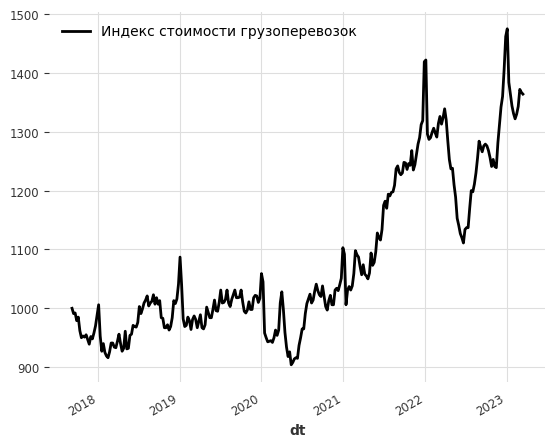

In [ ]:
import matplotlib.pyplot as plt

series.plot()
#prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [ ]:
traim = pd.read_excel('drive/MyDrive/Hakaton/data/train.xlsx')

In [ ]:
data = TimeSeries.from_dataframe(traim, "dt", "Цена на арматуру")

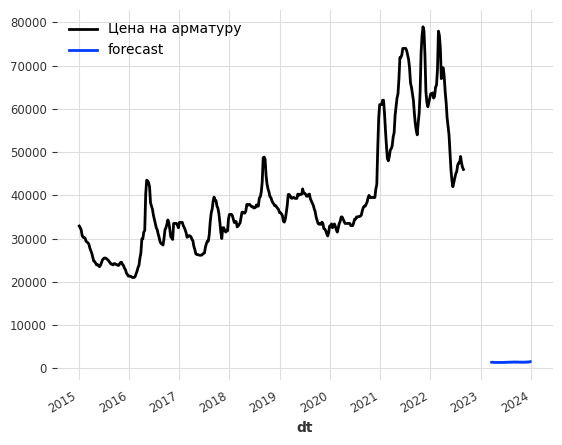

In [ ]:
model = ExponentialSmoothing()
model.fit(train)
train, val = data.split_before(0.9)
prediction = model.predict(len(val), num_samples=1000)

data.plot()
prediction.plot(label="forecast")
plt.legend()

In [ ]:
df1 = pd.read_excel('drive/MyDrive/Hakaton/data/Цены на сырье.xlsx')

In [ ]:
df2 = pd.merge(traim, df1, on="dt")

In [ ]:
df2

,dt,Цена на арматуру,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС",...,"Лом_3А, РФ FCA ж/д Свердловская обл, руб./т, без НДС","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т"
0,2015-02-09,30300,3850,228,12344,10009,12728,62,NaN,3700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-16,30100,3850,206,12271,10432,12852,63,NaN,3700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-23,29400,3850,207,12645,11981,13034,64,NaN,3700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-03-02,29200,3850,214,12696,11912,12910,63,NaN,3700.0,...,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN
4,2015-03-09,29000,4400,232,12916,12061,12964,61,NaN,4050.0,...,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2022-08-01,47500,8900,317,23751,17547,21835,112,445.0,7500.0,...,NaN,435.0,4602.0,3405.0,1984.0,41.0,51.0,72.0,90.0,159.0
391,2022-08-08,49000,7750,321,25568,21195,23534,109,435.0,6500.0,...,NaN,420.0,4602.0,3405.0,1984.0,41.0,51.0,72.0,90.0,159.0
392,2022-08-15,47500,7750,357,26015,21461,23841,109,455.0,6500.0,...,NaN,430.0,4602.0,3405.0,1984.0,41.0,51.0,72.0,90.0,159.0
393,2022-08-22,46500,7750,361,25881,21510,24239,102,455.0,6500.0,...,NaN,430.0,4602.0,3405.0,1984.0,41.0,51.0,72.0,90.0,159.0


In [ ]:
df3 = df2.copy()
df3 = df3.dropna(axis=1, how='all')
df3 = df3.fillna(0)
df3['dt'] = df3['dt'].values.astype(float)

In [ ]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df3.columns:
    df3[col] = absolute_maximum_scale(df3[col])

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 50 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   dt                                                                                                395 non-null    float64
 1   Цена на арматуру                                                                                  395 non-null    float64
 2   Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС                                  395 non-null    float64
 3   Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т                                                          395 non-null    float64
 4   Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС                                                      395 non-null    float64
 5   Л

In [ ]:
X1 = df3.drop(columns='Цена на арматуру')
y1 = df3['Цена на арматуру']

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
answers_pred1 = model1.predict(X1_test)


In [ ]:
# Метрики
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


print("R^2 : ", r2_score(y1_test, answers_pred1))
print("MAE :", mean_absolute_error(y1_test,answers_pred1))
print("RMSE:",np.sqrt(mean_squared_error(y1_test, answers_pred1)))

R^2 :  0.937748679545882
MAE : 0.03192128147499837
RMSE: 0.04330216938262745


In [ ]:
df3

,dt,Цена на арматуру,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС",...,"Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т"
0,0.856601,0.383544,0.169231,0.371336,0.350821,0.321450,0.371479,0.275556,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.856965,0.381013,0.169231,0.335505,0.348747,0.335035,0.375099,0.280000,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.857329,0.372152,0.169231,0.337134,0.359376,0.384783,0.380410,0.284444,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.857693,0.369620,0.169231,0.348534,0.360825,0.382567,0.376791,0.280000,0.000000,0.194737,...,0.000,0.000000,0.204117,0.165784,0.188801,0.237113,0.000000,0.000000,0.000000,0.000000
4,0.858056,0.367089,0.193407,0.377850,0.367078,0.387353,0.378367,0.271111,0.000000,0.213158,...,0.000,0.000000,0.204117,0.165784,0.188801,0.237113,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.998544,0.601266,0.391209,0.516287,0.675013,0.563542,0.637276,0.497778,0.520468,0.394737,...,0.495,0.541045,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
391,0.998908,0.620253,0.340659,0.522801,0.726653,0.680701,0.686863,0.484444,0.508772,0.342105,...,0.470,0.522388,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
392,0.999272,0.601266,0.340659,0.581433,0.739357,0.689244,0.695823,0.484444,0.532164,0.342105,...,0.465,0.534826,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
393,0.999636,0.588608,0.340659,0.587948,0.735548,0.690818,0.707440,0.453333,0.532164,0.342105,...,0.465,0.534826,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284




---



In [ ]:
df4 = df2.copy()
df4 = df4.dropna(axis=1, how='all')
df4 = df4.fillna(0)
#df4['dt'] = df4['dt'].values.astype(float)

def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df4.columns:
    if col != 'dt' and col != 'Цена на арматуру':
      df4[col] = absolute_maximum_scale(df4[col])

In [ ]:
df4

,dt,Цена на арматуру,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС",...,"Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т"
0,2015-02-09,30300,0.169231,0.371336,0.350821,0.321450,0.371479,0.275556,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2015-02-16,30100,0.169231,0.335505,0.348747,0.335035,0.375099,0.280000,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2015-02-23,29400,0.169231,0.337134,0.359376,0.384783,0.380410,0.284444,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2015-03-02,29200,0.169231,0.348534,0.360825,0.382567,0.376791,0.280000,0.000000,0.194737,...,0.000,0.000000,0.204117,0.165784,0.188801,0.237113,0.000000,0.000000,0.000000,0.000000
4,2015-03-09,29000,0.193407,0.377850,0.367078,0.387353,0.378367,0.271111,0.000000,0.213158,...,0.000,0.000000,0.204117,0.165784,0.188801,0.237113,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2022-08-01,47500,0.391209,0.516287,0.675013,0.563542,0.637276,0.497778,0.520468,0.394737,...,0.495,0.541045,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
391,2022-08-08,49000,0.340659,0.522801,0.726653,0.680701,0.686863,0.484444,0.508772,0.342105,...,0.470,0.522388,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
392,2022-08-15,47500,0.340659,0.581433,0.739357,0.689244,0.695823,0.484444,0.532164,0.342105,...,0.465,0.534826,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
393,2022-08-22,46500,0.340659,0.587948,0.735548,0.690818,0.707440,0.453333,0.532164,0.342105,...,0.465,0.534826,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284


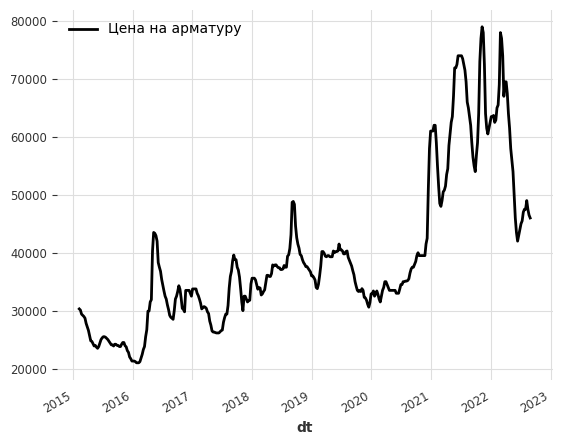

In [ ]:
time = TimeSeries.from_dataframe(df4, 'dt')
time['Цена на арматуру'].plot()

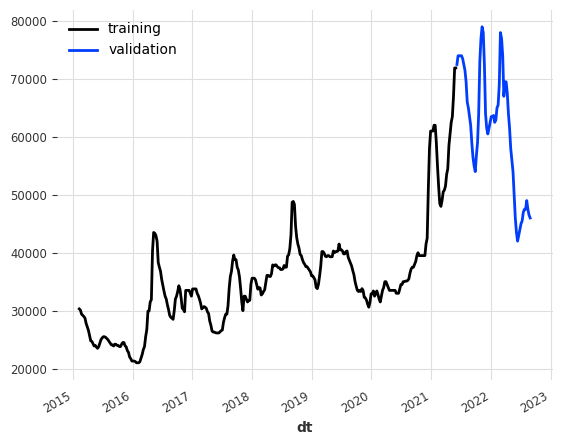

In [ ]:
train, val = time.split_before(pd.Timestamp("20210601"))
train['Цена на арматуру'].plot(label="training")
val['Цена на арматуру'].plot(label="validation")

In [ ]:
from darts.models import NaiveSeasonal
from darts.utils.statistics import plot_acf, check_seasonality
from darts.metrics import mape
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta


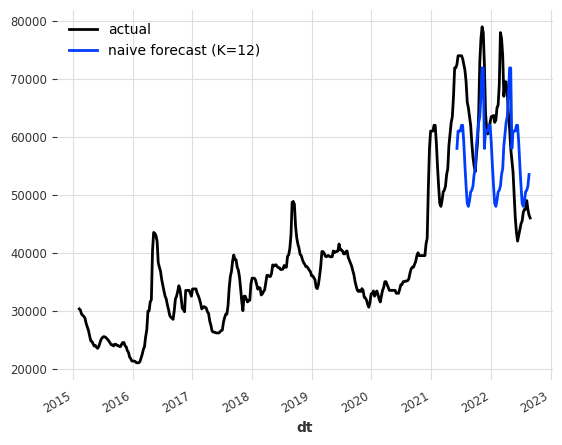

In [ ]:
seasonal_model = NaiveSeasonal(K=24)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(64)

time['Цена на арматуру'].plot(label="actual")
seasonal_forecast['Цена на арматуру'].plot(label="naive forecast (K=12)")

In [ ]:
train

<TimeSeries (DataArray) (dt: 330, component: 49, sample: 1)>
array([[[3.03000000e+04],
        [1.69230769e-01],
        [3.71335505e-01],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[3.01000000e+04],
        [1.69230769e-01],
        [3.35504886e-01],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[2.94000000e+04],
        [1.69230769e-01],
        [3.37133550e-01],
        ...,
...
        ...,
        [7.37410072e-01],
        [8.41743119e-01],
        [8.30223881e-01]],

       [[7.19000000e+04],
        [3.78021978e-01],
        [7.70358306e-01],
        ...,
        [7.37410072e-01],
        [8.41743119e-01],
        [8.30223881e-01]],

       [[7.19000000e+04],
        [3.78021978e-01],
        [7.73615635e-01],
        ...,
        [8.05755396e-01],
        [9.35779817e-01],
        [9.27238806e-01]]])
Coordinates:
  * dt         (dt) datetime64[ns] 2015-02-09 2015-02-16 ... 2021-05-31
  * component  (component) object 'Цена на арматуру' ... 'ЖРС_Украинские окат...
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [ ]:
from darts.models import NBEATSModel
model_air_milk = NBEATSModel(input_chunk_length=24,
                             output_chunk_length=12)
model_air_milk.fit(train)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 15.4 M
---------------------------------------------------
15.3 M    Trainable params
8.3 K     Non-trainable params
15.4 M    Total params
61.421    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12)

In [ ]:
pred = model_air_milk.predict(n=36, series=time)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

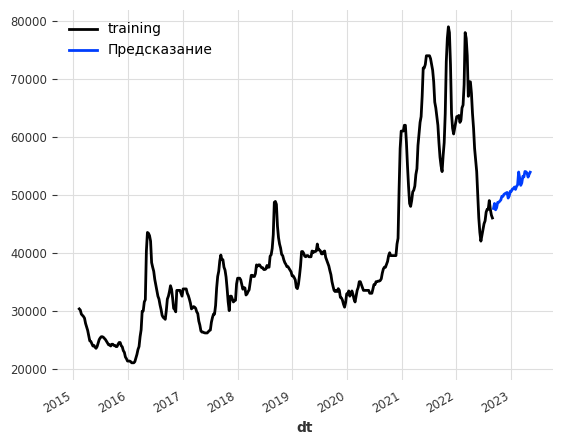

In [ ]:
time['Цена на арматуру'].plot(label="training")
pred['Цена на арматуру'].plot(label="Предсказание")

In [ ]:
predictionDataframe = pred.pd_dataframe()[['Цена на арматуру']]

N = 10

T = 10
weeks_size = N

predictionDataframe["moving_average"] = predictionDataframe["Цена на арматуру"].rolling(weeks_size).mean()
predictionDataframe["upper"] = predictionDataframe["moving_average"] + 0.5 * predictionDataframe["Цена на арматуру"].rolling(weeks_size).std()
predictionDataframe["lower"] = predictionDataframe["moving_average"] - 0.5 * predictionDataframe["Цена на арматуру"].rolling(weeks_size).std()

interval = T + N

predictionDataframe = predictionDataframe.tail(interval)

In [ ]:
predictionDataframe

component,Цена на арматуру,moving_average,upper,lower
dt,,,,
2022-12-26,50610.777216,49937.311713,50169.702521,49704.920904
2023-01-02,50603.160029,50086.747365,50289.356426,49884.138304
2023-01-09,50988.139517,50211.056601,50447.877939,49974.235263
2023-01-16,51037.202943,50343.060037,50594.907642,50091.212431
2023-01-23,51337.943294,50470.510114,50760.747149,50180.273079
2023-01-30,50925.435736,50542.518780,50836.785561,50248.251999
2023-02-06,51458.890083,50657.922709,50981.419893,50334.425525
2023-02-13,51705.627956,50788.156092,51146.805512,50429.506672
2023-02-20,53932.376329,51238.117526,51782.151671,50694.083382


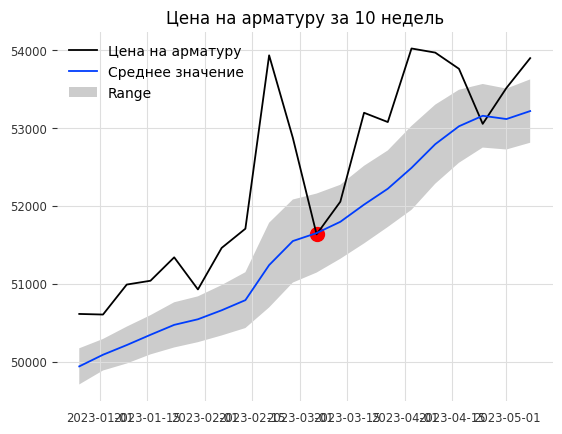

In [ ]:
plt.plot(predictionDataframe.index, predictionDataframe["Цена на арматуру"], label="Цена на арматуру")
plt.plot(predictionDataframe.index, predictionDataframe["moving_average"], label="Среднее значение")

plt.fill_between(predictionDataframe.index, predictionDataframe["lower"], predictionDataframe["upper"], alpha=0.2, label="Range")

plt.title("Цена на арматуру за {} недель".format(weeks_size))
plt.legend()

point_value = predictionDataframe.iloc[T]["Цена на арматуру"]
plt.scatter(predictionDataframe.index[T], point_value, color="red", s=100, label="Point")

plt.show()



---



In [ ]:
itog['Закупка на недели'] = 0
itog

component,dt,Цена на арматуру,moving_average,upper,lower,Закупка на недели
0,2022-12-26,50610.777216,49937.311713,50169.702521,49704.920904,0
1,2023-01-02,50603.160029,50086.747365,50289.356426,49884.138304,0
2,2023-01-09,50988.139517,50211.056601,50447.877939,49974.235263,0
3,2023-01-16,51037.202943,50343.060037,50594.907642,50091.212431,0
4,2023-01-23,51337.943294,50470.510114,50760.747149,50180.273079,0
5,2023-01-30,50925.435736,50542.518780,50836.785561,50248.251999,0
6,2023-02-06,51458.890083,50657.922709,50981.419893,50334.425525,0
7,2023-02-13,51705.627956,50788.156092,51146.805512,50429.506672,0
8,2023-02-20,53932.376329,51238.117526,51782.151671,50694.083382,0
9,2023-02-27,52871.704931,51547.125803,52080.651845,51013.599762,0


In [ ]:
currentIndex = 0
Nedeli = 0
for index, row in itog.iterrows():
    if row['Цена на арматуру'] < row['upper'] or Nedeli == 10 or index==itog.index[-1]:
      print(index, currentIndex, Nedeli)
      itog['Закупка на недели'][currentIndex] = index - currentIndex
      currentIndex = index
      Nedeli = 0
    else:
      Nedeli = Nedeli +1


10 0 10
11 10 0
17 11 5
19 17 1


In [ ]:
itog

component,dt,Цена на арматуру,moving_average,upper,lower,Закупка на недели
0,2022-12-26,50610.777216,49937.311713,50169.702521,49704.920904,10
1,2023-01-02,50603.160029,50086.747365,50289.356426,49884.138304,0
2,2023-01-09,50988.139517,50211.056601,50447.877939,49974.235263,0
3,2023-01-16,51037.202943,50343.060037,50594.907642,50091.212431,0
4,2023-01-23,51337.943294,50470.510114,50760.747149,50180.273079,0
5,2023-01-30,50925.435736,50542.518780,50836.785561,50248.251999,0
6,2023-02-06,51458.890083,50657.922709,50981.419893,50334.425525,0
7,2023-02-13,51705.627956,50788.156092,51146.805512,50429.506672,0
8,2023-02-20,53932.376329,51238.117526,51782.151671,50694.083382,0
9,2023-02-27,52871.704931,51547.125803,52080.651845,51013.599762,0


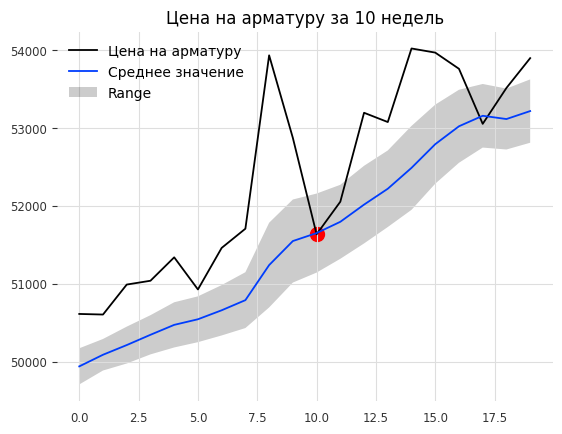

In [ ]:
plt.plot(itog.index, itog["Цена на арматуру"], label="Цена на арматуру")
plt.plot(itog.index, itog["moving_average"], label="Среднее значение")

plt.fill_between(itog.index, itog["lower"], itog["upper"], alpha=0.2, label="Range")

plt.title("Цена на арматуру за {} недель".format(weeks_size))
plt.legend()

point_value = itog.iloc[T]["Цена на арматуру"]
plt.scatter(itog.index[T], point_value, color="red", s=100, label="Point")

plt.show()

In [389]:
model_air_milk.save('drive/MyDrive/Hakaton/savedmodel.pt')

In [390]:
model = NBEATSModel(input_chunk_length=24,
                             output_chunk_length=12).load('drive/MyDrive/Hakaton/savedmodel.pt')

In [394]:
pred = model.predict(n=36, series=val)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

In [395]:
pred.pd_dataframe()[['Цена на арматуру']]

component,Цена на арматуру
dt,
2022-09-05,47642.102395
2022-09-12,48502.291643
2022-09-19,47406.934702
2022-09-26,47759.346971
2022-10-03,48682.894826
2022-10-10,48692.341569
2022-10-17,48903.640930
2022-10-24,49108.803502
2022-10-31,49745.047159
